(<Figure size 800x600 with 1 Axes>, <Axes: >)

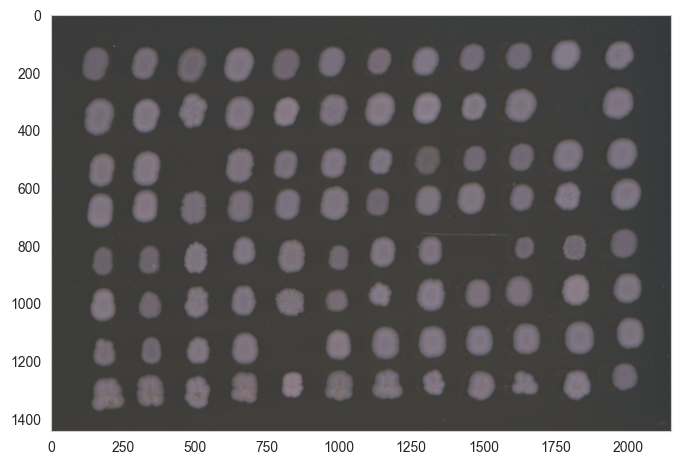

In [13]:
import phenotypic as pht

plate_image = pht.GridImage(pht.data.load_plate_72hr())
plate_image.show()

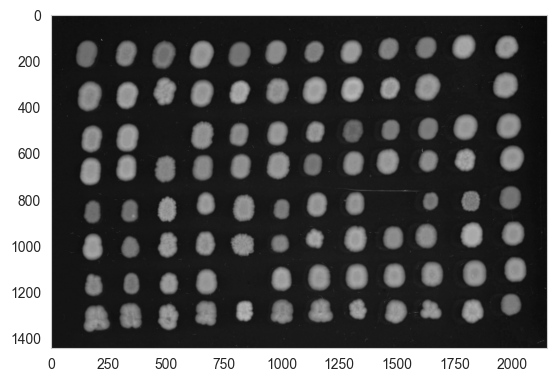

In [14]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(rgb2gray(plate_image.array[:]), cmap='gray')

(<Figure size 800x600 with 1 Axes>, <Axes: >)

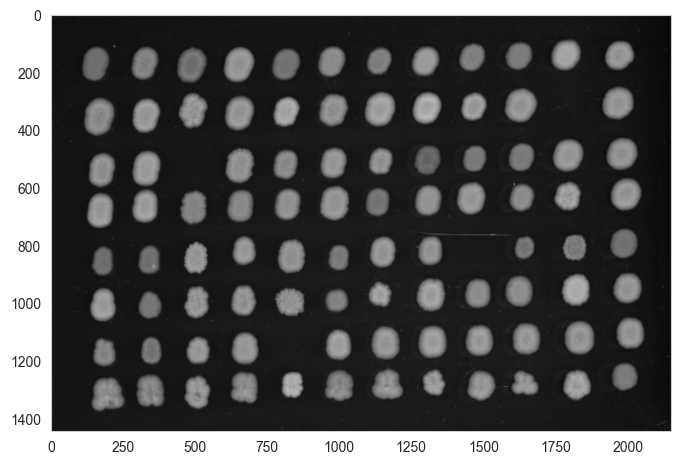

In [15]:
plate_image.matrix.show()

(<Figure size 1000x500 with 2 Axes>,
 array([(<Figure size 1000x500 with 2 Axes>, <Axes: title={'center': '84e13b0c-6bd4-41b7-9624-14f75ec247e7'}>),
        <Axes: >], dtype=object))

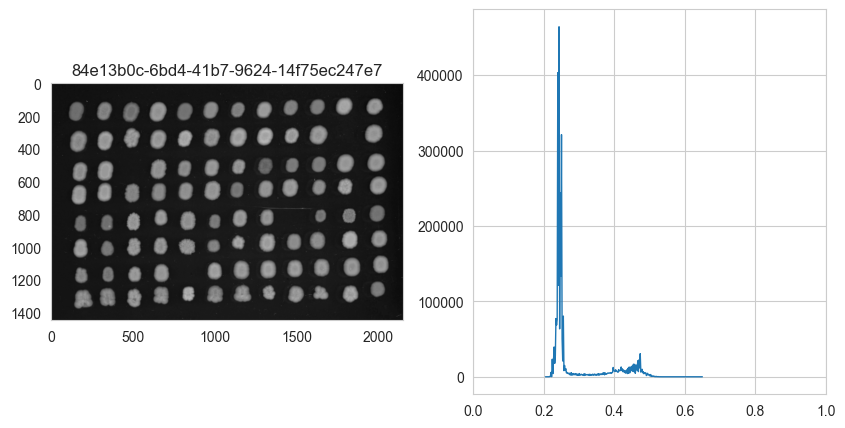

In [16]:
plate_image.enh_matrix.histogram()

(<Figure size 900x1000 with 1 Axes>, <Axes: >)

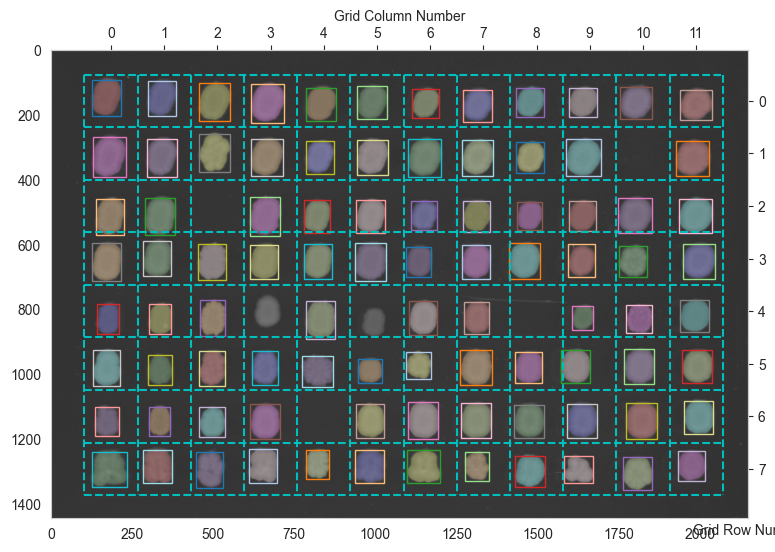

In [17]:
from phenotypic import ImagePipeline
from phenotypic.enhance import CLAHE, GaussianBlur, MedianEnhancer, ContrastStretching
from phenotypic.detection import WatershedDetector
from phenotypic.correction import GridAligner
from phenotypic.grid import GridApply, MinResidualErrorReducer, GridAlignmentOutlierRemover
from phenotypic.objedit import BorderObjectRemover, SmallObjectRemover, LowCircularityRemover
from phenotypic.objedit import MaskFill

from phenotypic.measure import MeasureColor, MeasureShape, MeasureIntensity, MeasureTexture

kmarx_pipeline = ImagePipeline(
        ops={
            'blur'                            : GaussianBlur(sigma=5),
            'clahe'                           : CLAHE(),
            'median filter'                   : MedianEnhancer(),
            'detection'                       : WatershedDetector(footprint='auto', min_size=50, relabel=True),
            'mask_fill'                       : MaskFill(),
            'RemoveBorderObjects'             : BorderObjectRemover(),
            'low circularity remover'         : LowCircularityRemover(0.7),
            'reduce by section residual error': MinResidualErrorReducer(),
            'outlier removal'                 : GridAlignmentOutlierRemover(),
            'align'                           : GridAligner(),
            'grid_reduction'                  : MinResidualErrorReducer(),
        },
        meas={
            'MeasureColor'    : MeasureColor(),
            'MeasureShape'    : MeasureShape(),
            'MeasureIntensity': MeasureIntensity(),
            'MeasureTexture'  : MeasureTexture(scale=3),
            'MeasureTexture2' : MeasureTexture(scale=4),
        }
)

pipeline_output = kmarx_pipeline.apply(plate_image)
pipeline_output.objects.relabel()
pipeline_output.show_overlay()


(<Figure size 1000x500 with 2 Axes>,
 array([(<Figure size 1000x500 with 2 Axes>, <Axes: title={'center': '7233cebb-2f79-4da0-a2a9-088ba1c5789f'}>),
        <Axes: >], dtype=object))

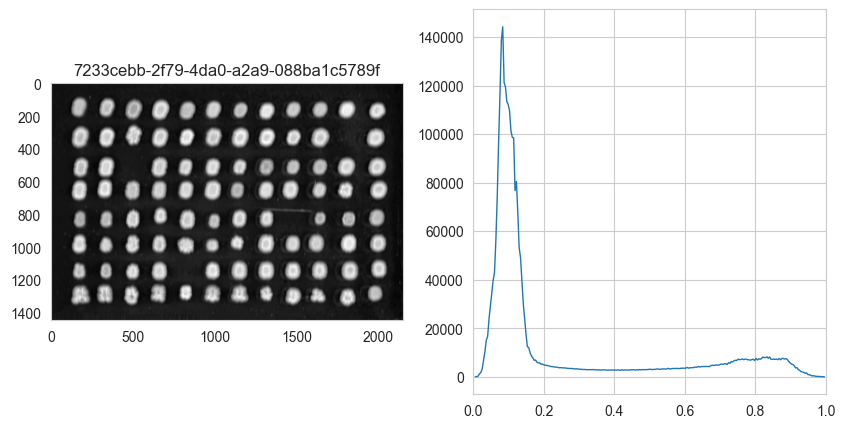

In [18]:
pipeline_output.enh_matrix.histogram()

In [19]:
pipeline_meas = kmarx_pipeline.measure(pipeline_output, include_metadata=False)
pipeline_meas

,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum,...,TextureGray_HaralickVariance-avg-scale04,TextureGray_InverseDifferenceMoment-avg-scale04,TextureGray_SumAverage-avg-scale04,TextureGray_SumVariance-avg-scale04,TextureGray_SumEntropy-avg-scale04,TextureGray_Entropy-avg-scale04,TextureGray_DiffVariance-avg-scale04,TextureGray_DiffEntropy-avg-scale04,TextureGray_InfoCorrelation1-avg-scale04,TextureGray_InfoCorrelation2-avg-scale04
0,1,146.506703,170.569699,91,128,204,216,0,0,0,...,0.227501,0.917104,23.561500,0.725170,1.245760,1.447084,0.044131,0.675382,-0.292161,0.617447
1,2,149.396380,340.542659,97,298,204,386,0,1,1,...,0.738942,0.779646,25.834356,2.456797,2.475868,2.975292,0.028841,1.102396,-0.263979,0.763785
2,3,160.823387,503.184827,103,456,218,552,0,2,2,...,0.491629,0.844037,24.416443,1.642722,2.198116,2.531479,0.035992,0.916609,-0.294202,0.753914
3,4,163.507507,667.136392,105,616,224,720,0,3,3,...,1.169566,0.787356,27.764862,4.112562,2.690033,3.187108,0.026823,1.193745,-0.348834,0.855079
4,5,162.581936,988.687380,112,945,214,1035,0,5,5,...,1.006358,0.829287,26.639336,3.560625,2.155954,2.585183,0.032185,1.086397,-0.390953,0.841887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1293.937771,489.301356,1239,448,1349,532,7,2,86,...,1.108200,0.742637,27.649365,3.755580,2.774204,3.409272,0.024679,1.263264,-0.269797,0.802120
86,87,1284.021505,1311.323189,1239,1275,1328,1350,7,7,91,...,1.370031,0.729467,27.969614,4.622844,2.764216,3.452672,0.021514,1.404993,-0.260746,0.795513
87,88,1298.299929,1475.423016,1250,1430,1348,1523,7,8,92,...,1.242901,0.774189,27.577465,4.450449,2.823792,3.349485,0.026872,1.125120,-0.352028,0.868454
88,89,1296.660489,1624.861193,1252,1582,1335,1670,7,9,93,...,1.464127,0.724083,27.086165,5.091357,2.989982,3.669252,0.023581,1.321775,-0.301962,0.848755


(<Figure size 800x600 with 1 Axes>, <Axes: >)

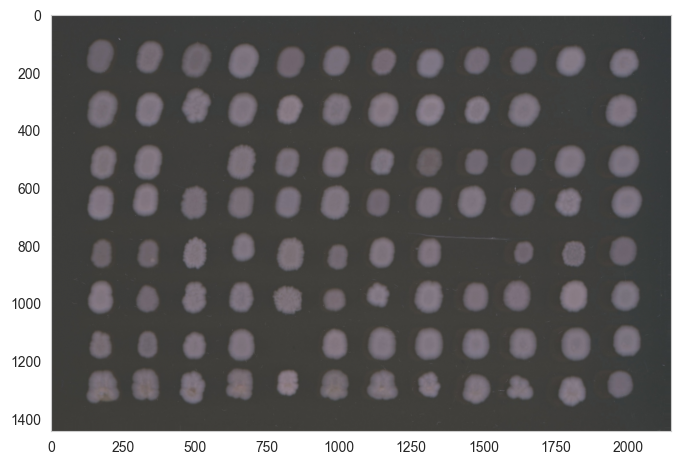

In [20]:
pipeline_output.array.show()

min: 0.18000000715255737 max: 0.6553000211715698


<Axes: ylabel='Count'>

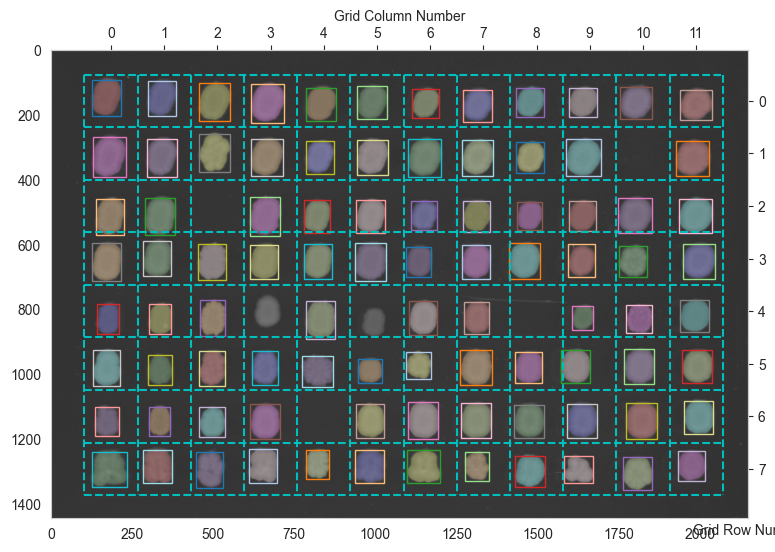

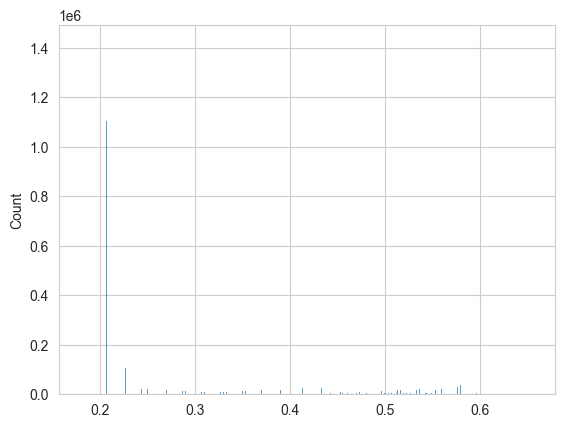

In [21]:
fig, ax = pipeline_output.show_overlay()
overlay_arr = ax.images[0].get_array()

import seaborn as sns
import matplotlib.pyplot as plt

hist_fig, hist_ax = plt.subplots()
print(f'min: {overlay_arr.min()} max: {overlay_arr.max()}')
sns.histplot(overlay_arr.ravel(), ax=hist_ax)

In [22]:
CLAHE.__name__

'CLAHE'

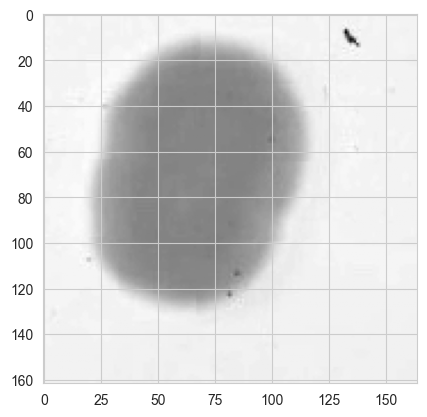

In [23]:
colony_image = pipeline_output.grid[0]
from skimage.util import invert

colony_matrix = invert(colony_image.matrix[:])

import matplotlib.pyplot as plt

plt.imshow(colony_matrix, cmap='gray')

TypeError: Unsupported dtype: bool

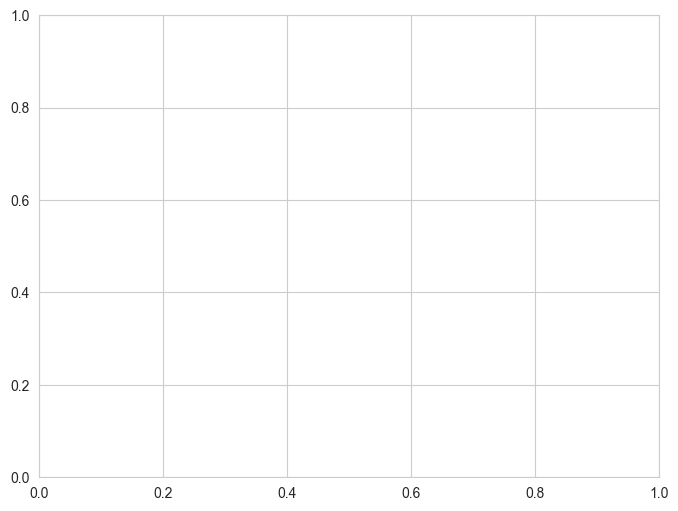

In [24]:
pipeline_output.objmask.show()

In [13]:
pipeline_output.grid.info()

,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum
0,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,1,146.506703,170.569699,91,128,204,216,0,0,0
1,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,2,149.396380,340.542659,97,298,204,386,0,1,1
2,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,3,160.823387,503.184827,103,456,218,552,0,2,2
3,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,4,163.507507,667.136392,105,616,224,720,0,3,3
4,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,5,162.581936,988.687380,112,945,214,1035,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,86,1293.937771,489.301356,1239,448,1349,532,7,2,86
86,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,87,1284.021505,1311.323189,1239,1275,1328,1350,7,7,91
87,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,88,1298.299929,1475.423016,1250,1430,1348,1523,7,8,92
88,8,GridImage,b'',0b82ceac-8a18-4cb4-a80f-2c295060a522,89,1296.660489,1624.861193,1252,1582,1335,1670,7,9,93


In [14]:
shape_measurements = MeasureShape().measure(pipeline_output)
shape_measurements

,ObjectLabel,Shape_Area,Shape_Perimeter,Shape_Circularity,Shape_ConvexArea,Shape_MedianRadius,Shape_MeanRadius,Shape_Eccentricity,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation
0,1,7683.0,335.563492,0.857415,317.616082,14.142136,15.782705,0.688207,24.189581,0.772627,9944.0,116.287931,84.368585,1.166296,-0.301111
1,2,7349.0,328.492424,0.855830,309.802847,13.928388,15.490497,0.672004,23.721538,0.780480,9416.0,112.570343,83.363638,1.168457,-0.346249
2,3,8278.0,347.948268,0.859223,328.849209,14.764823,16.493031,0.642563,25.172632,0.749819,11040.0,117.424997,89.974903,1.163842,-0.392919
3,4,9458.0,371.019336,0.863408,349.273610,16.000000,17.849295,0.609198,27.079057,0.764221,12376.0,123.330059,97.802935,1.158201,-0.400819
4,5,7274.0,321.078210,0.886669,305.533007,14.000000,15.731636,0.601665,23.807575,0.792375,9180.0,107.762019,86.074754,1.127817,-0.429974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,7151.0,328.492424,0.832772,309.230424,13.416408,14.925836,0.672877,23.125150,0.773918,9240.0,111.295764,82.331500,1.200809,0.026111
86,87,4929.0,271.178716,0.842282,255.516412,11.180340,12.558015,0.577093,19.290346,0.738427,6675.0,88.080214,71.933216,1.187251,0.189082
87,88,6995.0,317.078210,0.874309,299.816627,13.601471,15.440377,0.440490,23.330928,0.767501,9114.0,99.870924,89.659878,1.143761,-0.365050
88,89,5396.0,294.592929,0.781335,273.725269,11.180340,12.340611,0.497171,19.713196,0.738773,7304.0,90.984682,78.943092,1.279861,0.962156


In [15]:
intensity_measurements = MeasureIntensity().measure(pipeline_output)
intensity_measurements

,ObjectLabel,Intensity_IntegratedIntensity,Intensity_MinimumIntensity,Intensity_MaximumIntensity,Intensity_MeanIntensity,Intensity_MedianIntensity,Intensity_StandardDeviationIntensity,Intensity_CoefficientVarianceIntensity,Intensity_LowerQuartileIntensity,Intensity_UpperQuartileIntensity,Intensity_InterquartileRangeIntensity
0,1,2958.221342,0.315973,0.447028,0.385035,0.393280,0.018061,0.046913,0.376440,0.398012,0.021572
1,2,3051.176300,0.320162,0.450094,0.415183,0.424600,0.027032,0.065118,0.400252,0.434407,0.034155
2,3,3272.532053,0.328571,0.435546,0.395329,0.398831,0.021133,0.053463,0.386255,0.412017,0.025762
3,4,4201.881607,0.312051,0.483713,0.444267,0.458502,0.035672,0.080303,0.428522,0.470267,0.041745
4,5,3086.875557,0.310102,0.457401,0.424371,0.442251,0.032696,0.077056,0.407827,0.448993,0.041165
...,...,...,...,...,...,...,...,...,...,...,...
85,86,3162.189429,0.327134,0.499667,0.442202,0.453435,0.033906,0.076686,0.421029,0.469702,0.048673
86,87,2198.213529,0.319291,0.508597,0.445976,0.458502,0.039786,0.089229,0.423514,0.476123,0.052609
87,88,3087.983356,0.334977,0.497153,0.441456,0.454581,0.035957,0.081463,0.415938,0.469955,0.054016
88,89,2332.659890,0.304446,0.489875,0.432294,0.445071,0.039725,0.091911,0.406375,0.465497,0.059122


In [16]:
texture_measurements = MeasureTexture().measure(pipeline_output)
texture_measurements

,ObjectLabel,TextureGray_AngularSecondMoment-deg000-scale05,TextureGray_AngularSecondMoment-deg045-scale05,TextureGray_AngularSecondMoment-deg090-scale05,TextureGray_AngularSecondMoment-deg135-scale05,TextureGray_Contrast-deg000-scale05,TextureGray_Contrast-deg045-scale05,TextureGray_Contrast-deg090-scale05,TextureGray_Contrast-deg135-scale05,TextureGray_Correlation-deg000-scale05,...,TextureGray_DiffEntropy-deg090-scale05,TextureGray_DiffEntropy-deg135-scale05,TextureGray_InfoCorrelation1-deg000-scale05,TextureGray_InfoCorrelation1-deg045-scale05,TextureGray_InfoCorrelation1-deg090-scale05,TextureGray_InfoCorrelation1-deg135-scale05,TextureGray_InfoCorrelation2-deg000-scale05,TextureGray_InfoCorrelation2-deg045-scale05,TextureGray_InfoCorrelation2-deg090-scale05,TextureGray_InfoCorrelation2-deg135-scale05
0,1,0.312810,0.307367,0.326105,0.309108,0.666994,0.916944,0.532238,0.817002,0.687319,...,1.062547,1.359265,-0.333125,-0.243400,-0.386842,-0.240893,0.813167,0.731705,0.852881,0.734497
1,2,0.091986,0.086009,0.095051,0.088214,1.601762,2.610883,1.237082,1.954905,0.678537,...,1.587488,1.848722,-0.221334,-0.123231,-0.250377,-0.150611,0.805113,0.657987,0.836041,0.711302
2,3,0.125491,0.110529,0.138344,0.121315,0.897482,1.489496,0.788610,1.197602,0.701176,...,1.375489,1.594947,-0.260102,-0.127784,-0.287593,-0.174582,0.820841,0.645104,0.844756,0.724386
3,4,0.108555,0.093316,0.118324,0.103619,1.815700,3.001277,1.768568,2.667737,0.780891,...,1.742142,2.012112,-0.316783,-0.197018,-0.333282,-0.227693,0.893499,0.788716,0.903484,0.823460
4,5,0.253403,0.244918,0.260714,0.249708,1.578208,2.753601,1.621630,2.315885,0.759272,...,1.582318,1.878445,-0.340745,-0.206431,-0.320813,-0.220714,0.877023,0.758510,0.867317,0.778404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.059494,0.053433,0.061027,0.051924,2.336010,3.448436,2.068668,3.697787,0.699138,...,1.876695,2.230825,-0.221460,-0.127891,-0.229914,-0.126669,0.838256,0.707242,0.848542,0.703904
86,87,0.052387,0.047240,0.051921,0.043727,3.105662,4.728666,3.152527,5.099561,0.693687,...,2.115017,2.397729,-0.206396,-0.122527,-0.206867,-0.105101,0.833656,0.708679,0.835801,0.669960
87,88,0.061603,0.054094,0.066214,0.056213,1.653036,2.638518,1.531680,2.434700,0.814627,...,1.719674,1.977956,-0.316738,-0.213862,-0.314418,-0.217218,0.913629,0.835530,0.912994,0.839852
88,89,0.046225,0.040130,0.045858,0.041598,2.201249,3.695462,2.843668,4.460186,0.793845,...,2.055371,2.355152,-0.277470,-0.173671,-0.240946,-0.168143,0.899325,0.800409,0.873219,0.791488


,ObjectLabel,Color_CieXMin,Color_CieXQ1,Color_CieXMean,Color_CieXMedian,Color_CieXQ3,Color_CieXMax,Color_CieXStdDev,Color_CieXCoefficientVariance,Color_CieYMin,...,Color_BrightnessMin,Color_BrightnessQ1,Color_BrightnessMean,Color_BrightnessMedian,Color_BrightnessQ3,Color_BrightnessMax,Color_BrightnessStdDev,Color_BrightnessCoefficientVariance,Color_ChromaEstimatedMean,Color_ChromaEstimatedMedian
0,1,0.303353,0.366643,0.375069,0.382274,0.389729,0.433750,0.018694,0.049848,0.315975,...,0.325490,0.400000,0.409941,0.415686,0.427451,0.466667,0.022148,0.054034,3.882206,3.840626
1,2,0.307282,0.389742,0.405351,0.416932,0.425108,0.440018,0.027782,0.068546,0.320164,...,0.329412,0.427451,0.442559,0.454902,0.462745,0.478431,0.029886,0.067539,4.030819,4.304368
2,3,0.316152,0.374111,0.384852,0.389729,0.400911,0.423276,0.021487,0.055839,0.328573,...,0.341176,0.407843,0.418482,0.423529,0.435294,0.458824,0.023953,0.057245,3.552761,3.638739
3,4,0.299410,0.416932,0.433313,0.448888,0.460071,0.474994,0.036527,0.084306,0.312053,...,0.321569,0.458824,0.475757,0.494118,0.501961,0.525490,0.039734,0.083527,4.330965,4.678852
4,5,0.295683,0.396901,0.413728,0.430744,0.438199,0.447069,0.033311,0.080526,0.310103,...,0.325490,0.435294,0.455866,0.474510,0.482353,0.498039,0.038618,0.084725,4.269135,4.652391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.314535,0.409795,0.431273,0.441926,0.458364,0.490105,0.034356,0.079674,0.327137,...,0.345098,0.454902,0.474502,0.486275,0.501961,0.533333,0.037547,0.079139,3.950601,4.213721
86,87,0.309100,0.412093,0.435267,0.448888,0.466907,0.498873,0.040505,0.093077,0.319294,...,0.333333,0.450980,0.478372,0.494118,0.513725,0.552941,0.045051,0.094196,4.162647,4.321553
87,88,0.324010,0.405749,0.430596,0.443745,0.459217,0.485871,0.036370,0.084477,0.334980,...,0.349020,0.443137,0.470576,0.486275,0.501961,0.533333,0.039857,0.084710,3.974293,4.193629
88,89,0.291359,0.394567,0.420498,0.434243,0.454220,0.478708,0.040350,0.095974,0.304446,...,0.317647,0.431373,0.461090,0.478431,0.498039,0.533333,0.045196,0.098038,3.755356,3.815770


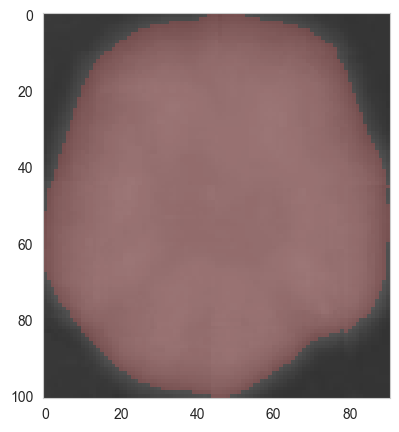

In [17]:
single_object = pipeline_output.objects[-1]
fig, ax = single_object.show_overlay()
color_measurements = MeasureColor().measure(pipeline_output)
color_measurements

In [18]:
color_measurements

,ObjectLabel,Color_CieXMin,Color_CieXQ1,Color_CieXMean,Color_CieXMedian,Color_CieXQ3,Color_CieXMax,Color_CieXStdDev,Color_CieXCoefficientVariance,Color_CieYMin,...,Color_BrightnessMin,Color_BrightnessQ1,Color_BrightnessMean,Color_BrightnessMedian,Color_BrightnessQ3,Color_BrightnessMax,Color_BrightnessStdDev,Color_BrightnessCoefficientVariance,Color_ChromaEstimatedMean,Color_ChromaEstimatedMedian
0,1,0.303353,0.366643,0.375069,0.382274,0.389729,0.433750,0.018694,0.049848,0.315975,...,0.325490,0.400000,0.409941,0.415686,0.427451,0.466667,0.022148,0.054034,3.882206,3.840626
1,2,0.307282,0.389742,0.405351,0.416932,0.425108,0.440018,0.027782,0.068546,0.320164,...,0.329412,0.427451,0.442559,0.454902,0.462745,0.478431,0.029886,0.067539,4.030819,4.304368
2,3,0.316152,0.374111,0.384852,0.389729,0.400911,0.423276,0.021487,0.055839,0.328573,...,0.341176,0.407843,0.418482,0.423529,0.435294,0.458824,0.023953,0.057245,3.552761,3.638739
3,4,0.299410,0.416932,0.433313,0.448888,0.460071,0.474994,0.036527,0.084306,0.312053,...,0.321569,0.458824,0.475757,0.494118,0.501961,0.525490,0.039734,0.083527,4.330965,4.678852
4,5,0.295683,0.396901,0.413728,0.430744,0.438199,0.447069,0.033311,0.080526,0.310103,...,0.325490,0.435294,0.455866,0.474510,0.482353,0.498039,0.038618,0.084725,4.269135,4.652391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.314535,0.409795,0.431273,0.441926,0.458364,0.490105,0.034356,0.079674,0.327137,...,0.345098,0.454902,0.474502,0.486275,0.501961,0.533333,0.037547,0.079139,3.950601,4.213721
86,87,0.309100,0.412093,0.435267,0.448888,0.466907,0.498873,0.040505,0.093077,0.319294,...,0.333333,0.450980,0.478372,0.494118,0.513725,0.552941,0.045051,0.094196,4.162647,4.321553
87,88,0.324010,0.405749,0.430596,0.443745,0.459217,0.485871,0.036370,0.084477,0.334980,...,0.349020,0.443137,0.470576,0.486275,0.501961,0.533333,0.039857,0.084710,3.974293,4.193629
88,89,0.291359,0.394567,0.420498,0.434243,0.454220,0.478708,0.040350,0.095974,0.304446,...,0.317647,0.431373,0.461090,0.478431,0.498039,0.533333,0.045196,0.098038,3.755356,3.815770


In [19]:
pipeline_measurements = kmarx_pipeline.measure(pipeline_output, include_metadata=False)

In [20]:
pipeline_measurements

,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum,...,TextureGray_DiffEntropy-deg090-scale04,TextureGray_DiffEntropy-deg135-scale04,TextureGray_InfoCorrelation1-deg000-scale04,TextureGray_InfoCorrelation1-deg045-scale04,TextureGray_InfoCorrelation1-deg090-scale04,TextureGray_InfoCorrelation1-deg135-scale04,TextureGray_InfoCorrelation2-deg000-scale04,TextureGray_InfoCorrelation2-deg045-scale04,TextureGray_InfoCorrelation2-deg090-scale04,TextureGray_InfoCorrelation2-deg135-scale04
0,1,146.506703,170.569699,91,128,204,216,0,0,0,...,0.979691,1.247260,-0.386594,-0.299149,-0.438971,-0.304881,0.849641,0.786493,0.880318,0.795115
1,2,149.396380,340.542659,97,298,204,386,0,1,1,...,1.455283,1.698713,-0.283636,-0.185987,-0.314101,-0.214029,0.861375,0.762144,0.883851,0.798363
2,3,160.823387,503.184827,103,456,218,552,0,2,2,...,1.227464,1.443855,-0.336812,-0.207411,-0.363289,-0.251184,0.877064,0.766766,0.892664,0.813477
3,4,163.507507,667.136392,105,616,224,720,0,3,3,...,1.590944,1.847752,-0.377934,-0.264191,-0.395229,-0.293846,0.924732,0.856792,0.931954,0.879191
4,5,162.581936,988.687380,112,945,214,1035,0,5,5,...,1.460831,1.741774,-0.394116,-0.267746,-0.378158,-0.279900,0.906291,0.823788,0.900514,0.836449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1293.937771,489.301356,1239,448,1349,532,7,2,86,...,1.716994,2.045672,-0.285249,-0.190109,-0.293858,-0.182136,0.890460,0.804031,0.897396,0.793448
86,87,1284.021505,1311.323189,1239,1275,1328,1350,7,7,91,...,1.944392,2.226655,-0.272911,-0.180748,-0.271853,-0.164513,0.891838,0.804089,0.892182,0.781426
87,88,1298.299929,1475.423016,1250,1430,1348,1523,7,8,92,...,1.571433,1.806261,-0.371141,-0.269784,-0.373905,-0.279622,0.938290,0.884547,0.939684,0.891710
88,89,1296.660489,1624.861193,1252,1582,1335,1670,7,9,93,...,1.886512,2.167317,-0.340881,-0.231664,-0.304403,-0.228744,0.933238,0.864619,0.916141,0.860952
